In [1]:
import telebot
import urllib
import unidecode
import pandas as pd
import json
import os

In [2]:
bot = telebot.TeleBot("1137737776:AAGsXD5pfSTrAWp4W_5oE3W4dnDgMW_4GuI")

In [3]:
sisu = pd.read_csv("dados_sisu.csv",encoding="iso-8859-1")

In [4]:
profissoes = sisu.Curso.values

In [5]:
profissoes = [unidecode.unidecode(x.lower()) for x in profissoes]

In [6]:
def cadastro_usuario(id_telegram, nome_comp, idade, periodo_estd):
    
    if not os.path.isfile(str(id_telegram)+"_"+nome_comp.split(" ")[0].lower()+".json"):
        usuario = {'id_telegram' : id_telegram, 'nome_completo' : nome_comp, 'idade' : idade, 'periodo_estd' : periodo_estd, 'saldo' : 0, 'trilhas': {}}
        js = json.dumps(usuario)
        
        with open(str(id_telegram)+"_"+nome_comp.split(" ")[0].lower()+".json", "a") as target:
            json.dump(js,target)


In [7]:
def ler_cadastro(id_telegram, nome_comp):
    with open(id_telegram+"_"+nome_comp.split(" ")[0].lower()+".json", "r") as target:
        js = json.load(target)
        return js

In [8]:
def procura_profissao(text):    
    return unidecode.unidecode(text.lower()) in profissoes

In [9]:
@bot.message_handler(commands=['start','help'])
def send_welcome(message):
    name = message.from_user.first_name
    if os.path.isfile(str(message.from_user.id)+"_"+name.lower()+".json"):
        welcome_message = f"""*Qual é o seu sonho {name}?*
        _Nos conte qual o seu sonho, o que você quer ser quando crescer?_"""
        bot.reply_to(message,welcome_message,parse_mode= 'MarkdownV2')
    else:
        bot.reply_to(message,"Olá, antes de começar precisamos te conhecer melhor. Qual sua idade e melhor período para estudo (manhã,tarde,noite) separados por espaço(Ex: 14 tarde)?")

In [10]:
@bot.message_handler(regexp=r"\d{1,2} \w[a-zA-zã]*")
def regex(message):    
    cadastro_usuario(message.from_user.id,message.from_user.first_name+" "+message.from_user.last_name,message.text.split(" ")[0],message.text.split(" ")[1])
    bot.reply_to(message, "Informações cadastradas com sucesso. click em /start para começar o processo.")

In [11]:
@bot.message_handler(commands=['wakanda'])
def send_gif(message):
    gif = open('wakanda.gif','rb')
    bot.send_animation(message.chat.id,gif)

In [12]:
@bot.message_handler(commands=['trilhas'])
def mostra_trilha(message):
    markup = telebot.types.ReplyKeyboardMarkup(row_width=1, one_time_keyboard=True)
    _ = [markup.row(telebot.types.KeyboardButton(x)) for x in sisu.Curso.values]
    bot.send_message(message.chat.id,f'As trilhas disponíveis são:',parse_mode= 'MarkdownV2',reply_markup= markup )


In [13]:
@bot.message_handler(commands=['pontos'])
def mostra_saldo(message):
    bot.send_message(message.chat.id,f'O seu saldo é R$ 5,00',parse_mode= 'MarkdownV2')

In [14]:
@bot.message_handler(commands=['corte'])
def nota_corte(message):
    tokens = message.text.split(' ',1)
    if len(tokens) == 1:
        markup = telebot.types.ReplyKeyboardMarkup(row_width=1, one_time_keyboard=True)
        _ = [markup.row(telebot.types.KeyboardButton(f"/corte {x}")) for x in sisu.Curso.values]

        bot.send_message(message.chat.id,f'Notas de corte disponíveis:',parse_mode= 'MarkdownV2',reply_markup= markup )
    else:
        bot.reply_to(message,f"A nota de corte para o curso de {tokens[-1]} é {sisu[sisu['Curso']==tokens[-1]]['Nota'].values[0]}.") 

In [15]:
@bot.message_handler(func=lambda m: True)
def echo_all(message):
    teste = procura_profissao(message.text)
    texto = message.text
    if teste:        
        bot.send_message(message.chat.id,f"Uhull que legal que você quer cursar {texto}. Veja a trilha que preparamos para você 🙂 https://humbbetao-github-io.now.sh/")
        #bot.reply_to(message,'aqui.',parse_mode= 'MarkdownV2')
    else:
        bot.reply_to(message,'Que pena, ainda não temos uma trilha para essa profissão :(. Digite /trilhas para consultar as trilhas disponíveis.')
        #bot.reply_to(message,'aqui',parse_mode= 'MarkdownV2')


In [19]:
"robo" in "quero contruir robo"

True

In [16]:
bot.polling()

{'content_type': 'text', 'message_id': 215, 'from_user': {'id': 1049407683, 'is_bot': False, 'first_name': 'Juliano', 'username': None, 'last_name': 'Oliveira', 'language_code': 'en'}, 'date': 1583659355, 'chat': {'type': 'private', 'last_name': 'Oliveira', 'first_name': 'Juliano', 'username': None, 'id': 1049407683, 'title': None, 'all_members_are_administrators': None, 'photo': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'sticker_set_name': None, 'can_set_sticker_set': None}, 'forward_from_chat': None, 'forward_from_message_id': None, 'forward_from': None, 'forward_date': None, 'reply_to_message': None, 'edit_date': None, 'media_group_id': None, 'author_signature': None, 'text': '/start', 'entities': [<telebot.types.MessageEntity object at 0x0000018409A62518>], 'caption_entities': None, 'audio': None, 'document': None, 'photo': None, 'sticker': None, 'video': None, 'video_note': None, 'voice': None, 'caption': None, 'contact': None, 'location': None, 'venu

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Jarvis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


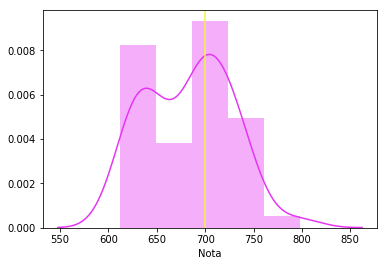

In [18]:
sns.distplot(sisu.Nota,color="#E435F3")
plt.axvline(700, 0,1,c="#f2f542",)